In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin
import pandas as pd
import os
import numpy as np

In [140]:
accountDB = pd.read_csv('data/account.csv', sep=";")
accountDB

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102
...,...,...,...,...
4495,124,55,monthly issuance,971228
4496,3958,59,monthly issuance,971228
4497,777,30,monthly issuance,971228
4498,1573,63,monthly issuance,971229


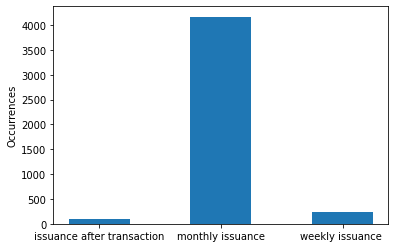

In [139]:
plt.ylabel("Occurrences")
plt.bar(["issuance after transaction", "monthly issuance", "weekly issuance "],list(accountDB.pivot_table(columns=["frequency"],aggfunc="size")), width=0.5)
plt.savefig("images/DU/account_frequencies")

In [143]:
accountDB.pivot_table(columns=["district_id"],aggfunc="size")

district_id
1     554
2      42
3      50
4      48
5      65
     ... 
73     56
74    135
75     51
76     55
77     40
Length: 77, dtype: int64

In [109]:
clientDB = pd.read_csv('data/client.csv', sep=";")
clientDB.insert(0, "women",(((clientDB['birth_number'] - ((clientDB['birth_number']//10000 * 10000) + (clientDB['birth_number'] - clientDB['birth_number']//100 * 100)))//100) > 50))
clientDB.insert(0,"age", 1996 - (1900 + clientDB['birth_number']//10000))
clientDB.sort_values(by=["age"])

,age,women,client_id,birth_number,district_id
3244,9,True,3428,875927,42
4122,10,False,4354,860813,28
701,11,True,734,855114,46
3234,11,True,3417,855318,35
5081,11,False,10201,851019,13
...,...,...,...,...,...
2045,83,False,2162,130912,1
3935,83,False,4159,131206,35
1573,84,False,1665,120302,64
4455,85,False,4714,110820,13


In [89]:
clientDB.pivot_table(columns=["age"], aggfunc='size')

age
34     1
35     1
36     3
37     1
38     3
      ..
106    4
107    4
108    3
109    1
110    2
Length: 77, dtype: int64

In [19]:
clientDB['age'].mean(), clientDB["age"].median()

(67.80163903892718, 67.0)

In [10]:
dispositionDB = pd.read_csv('data/disp.csv', sep=";")
dispositionDB.sort_values(by=["client_id"])

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [6]:
districtDB = pd.read_csv('data/district.csv', sep=";")
districtDB

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [106]:
loanDB = pd.read_csv('data/loan_train.csv', sep=";")
max(1900 + loanDB["date"]//10000)
loanDB[loanDB['date']//10000 == 96

,loan_id,account_id,date,amount,duration,payments,status
211,6589,7815,960101,189696,24,7904,1
212,5900,4503,960101,135360,48,2820,1
213,5999,4907,960103,98832,48,2059,1
214,6043,5126,960111,20352,48,424,1
215,5482,2496,960112,165120,60,2752,1
...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242,1
324,5625,3189,961215,222180,60,3703,-1
325,6805,8972,961221,45024,48,938,1
326,7233,10963,961225,115812,36,3217,1


In [8]:
transactionDB = pd.read_csv('data/trans_train.csv', sep=";")
transactionDB

/home/iohan-sardinha/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
396680,515914,1763,961231,withdrawal,withdrawal in cash,14.6,67769.5,payment for statement,NaN,NaN
396681,516262,1765,961231,withdrawal,withdrawal in cash,14.6,19708.1,payment for statement,NaN,NaN
396682,520019,1775,961231,withdrawal,withdrawal in cash,14.6,15944.5,payment for statement,NaN,NaN
396683,517894,1769,961231,withdrawal,withdrawal in cash,14.6,34679.4,payment for statement,NaN,NaN
